In [1]:
import numpy as np
import numpy, scipy.optimize
import matplotlib.pyplot as plt

arr = [[259, 260, 261, 262, 262, 263, 263, 263, 263, 263, 262, 261, 260, 259, 258, 257, 256, 254, 253, 253, 252, 252, 252, 252, 253, 253, 254, 255, 256, 257, 258, 259, 260, 261, 261, 262, 262, 261, 261, 260, 259, 258, 257, 256, 254, 253, 252, 251, 251, 250, 250, 250, 251, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 260, 260, 260, 259, 259, 258, 257, 256, 254, 253, 252, 251, 250, 249, 249, 249, 249, 249, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 258, 258, 258, 258, 257, 256, 255, 254, 253], [286, 290, 294, 297, 300, 301, 301, 300, 298, 295, 291, 287, 283, 279, 276, 273, 271, 271, 271, 273, 275, 278, 281, 284, 287, 290, 292, 293, 293, 293, 292, 290, 288, 286, 284, 282, 281, 280, 279, 279, 279, 280, 281, 282, 283, 283, 284, 284, 283, 282, 281, 280, 279, 279, 278, 278, 278, 279, 281, 282, 284, 286, 288, 290, 291, 291, 290, 289, 287, 284, 281, 278, 275, 272, 269, 268, 267, 268, 269, 272, 275, 279, 283, 287, 290, 293, 295, 296, 296, 294, 292, 288, 284, 280, 275, 271, 268, 265, 264, 263], [236, 244, 250, 255, 256, 255, 251, 246, 241, 237, 236, 237, 241, 246, 252, 258, 263, 264, 263, 259, 253, 245, 238, 233, 230, 229, 232, 236, 241, 246, 249, 249, 247, 242, 236, 229, 222, 218, 216, 217, 220, 226, 232, 237, 240, 241, 239, 234, 228, 221, 216, 212, 211, 212, 216, 222, 228, 232, 235, 235, 232, 227, 221, 214, 209, 206, 206, 208, 214, 220, 227, 233, 236, 237, 235, 231, 226, 222, 218, 217, 219, 224, 231, 239, 247, 253, 256, 257, 254, 250, 244, 239, 235, 234, 235, 238, 243, 249, 254, 257], [291, 300, 308, 314, 318, 318, 317, 313, 308, 302, 298, 295, 293, 293, 295, 297, 300, 302, 303, 303, 301, 299, 296, 293, 291, 290, 290, 292, 294, 296, 298, 299, 298, 295, 291, 286, 281, 276, 274, 273, 275, 279, 286, 293, 301, 308, 313, 315, 315, 312, 306, 299, 292, 285, 280, 277, 275, 276, 278, 280, 283, 285, 286, 286, 285, 283, 281, 280, 280, 281, 284, 287, 291, 295, 298, 299, 299, 298, 295, 291, 288, 286, 286, 288, 293, 299, 306, 314, 321, 327, 330, 330, 327, 321, 314, 306, 298, 292, 287, 285]]


def fit_sin_base(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    plt.plot(Fyy[1:])
    # plt.show()
    guess_index = numpy.argmax(Fyy[4:len(Fyy)//2])+4
    a = Fyy
    print(numpy.r_[True, a[1:] < a[:-1]] & numpy.r_[a[:-1] < a[1:], True])
    guess_freq = abs(ff[guess_index]+4)   # excluding the zero frequency "peak", which is related to offset
    print(guess_index)
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, +0.01,
                         guess_amp, 2.*numpy.pi*guess_freq, -0.01,
#                          guess_amp, 2.*numpy.pi*guess_freq, 0.,
                         numpy.mean(yy[:len(yy)//2]) - numpy.mean(yy[len(yy)//2:]) / (len(yy)//2), 
                         guess_offset])

    def sinfunc(t, 
                A1, w1, p1, 
                A2, w2, p2,
#                 A3, w3, p3, 
                k, c):  return (A1 * numpy.sin(w1*t + p1) + 
                                A2 * numpy.sin(w2*t + p2) +
#                               A3 * numpy.sin(w3*t + p3) +
                                k*t + c)
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    (A1, w1, p1,
     A2, w2, p2, 
#      A3, w3, p3,
     k, c) = popt
    
    fitfunc = lambda t: sinfunc(t, *popt)
    loss = np.sum(np.abs([fitfunc(t) for t in tt] -  yy))

    fitfunc = lambda t: sinfunc(t, *popt)
    return {"loss": loss, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}


def optimise_case(arr_in):
    
    larger_range = 1099

    yy = arr_in
    tt = range(len(yy))
    res = fit_sin_base(tt,yy)
    res

    plt.plot(tt, yy, "-k", label="y", linewidth=2)
    # plt.plot(tt, diff, label="y", linewidth=2)
    plt.plot(tt, res["fitfunc"](tt), "r-", label="y fit curve", linewidth=2)
    plt.legend(loc="best")
    plt.show()

    preds = list(res["fitfunc"](range(larger_range)))
    moves = [a>b for a,b in zip(preds[1:],preds[:-1])]
    answer = []
    for i,_ in enumerate(moves[:-1]):
        if moves[i] != moves[i+1]:
            if moves[i]:
                answer.append(i)
            else:
                answer.append(-i)

    plt.figure(figsize=(14,3))
    plt.plot(tt, yy, "-k", label="y", linewidth=2)
    plt.plot(range(larger_range), res["fitfunc"](range(larger_range)), "r-", label="y fit curve", linewidth=2)
    plt.legend(loc="best")
    for xc in answer:
        if xc > 0 and xc < 200:
            plt.axvline(x=xc+1)
    plt.show()

    ans = []
    for a in answer:
        if abs(a) > 100:
            ans.append(a)
    if ans[0] > 0:
        del ans[0]
    # no need to fix the end

    ans = [abs(a) for a in ans]

    plt.figure(figsize=(14,3))
    plt.plot(tt, yy, "-k", label="y", linewidth=2)
    plt.plot(range(larger_range), res["fitfunc"](range(larger_range)), "r-", label="y fit curve", linewidth=2)
    plt.legend(loc="best")
    for xc in ans:
        if xc > 0 and xc < 200:
            plt.axvline(x=xc+1)
    plt.show()
    
    return ans

[False False  True False False False False False False False False  True
 False False  True False  True False  True False  True False False False
  True False False False  True False  True False  True False False  True
 False False  True False False  True False False False  True False  True
 False  True False  True False  True False  True False False False  True
 False False  True False False  True False False  True False  True False
  True False False False  True False False False  True False  True False
  True False  True False False  True False False False False False False
 False False  True False]
4


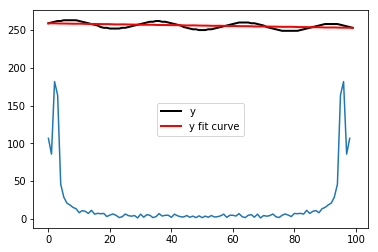

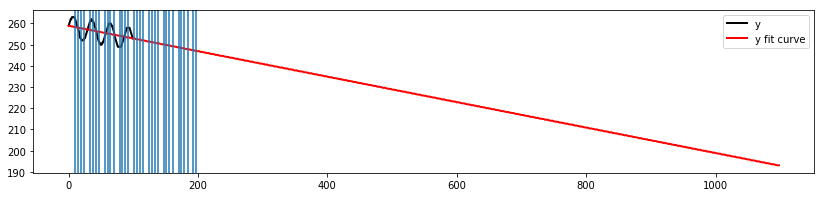

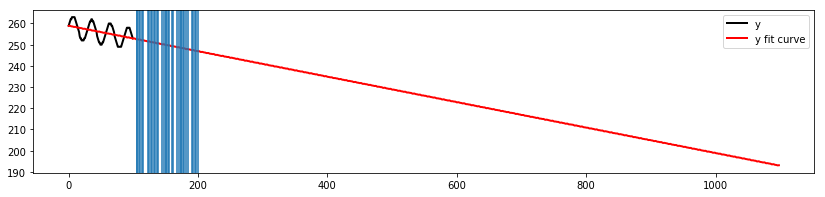

[False False  True False False False False False False False False False
 False False False  True False False  True False  True False False  True
 False False  True False False  True False False  True False False  True
 False  True False  True False False  True False False False  True False
 False False  True False False False  True False False False  True False
 False  True False  True False  True False False  True False False  True
 False False  True False False  True False False  True False  True False
 False  True False False False False False False False False False False
 False False  True False]
5


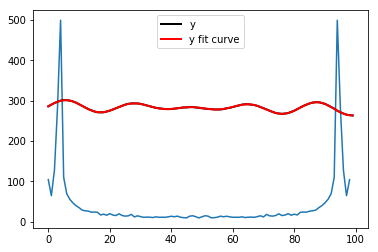

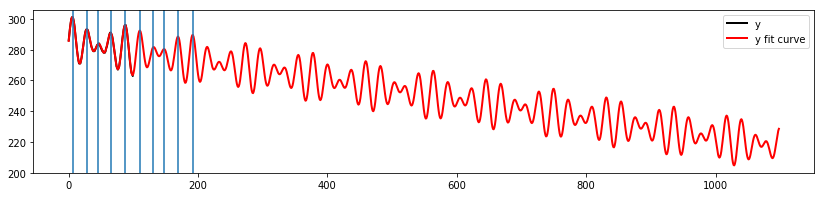

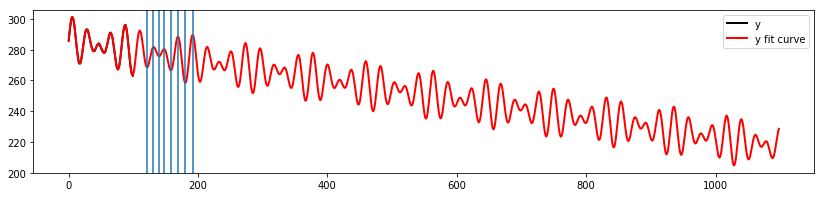

[False False  True False False  True False False False False False False
 False False False False False False  True False  True False  True False
  True False  True False False  True False  True False False  True False
 False False  True False False  True False False  True False  True False
 False False  True False False False  True False  True False False  True
 False False  True False False False  True False False  True False  True
 False False  True False  True False  True False  True False  True False
 False False False False False False False False False False False  True
 False False  True False]
7


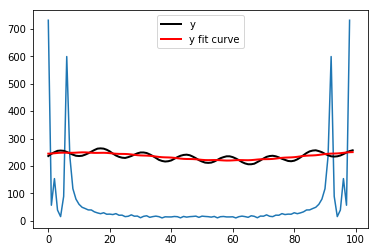

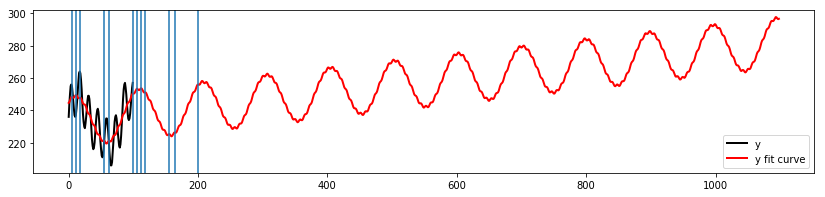

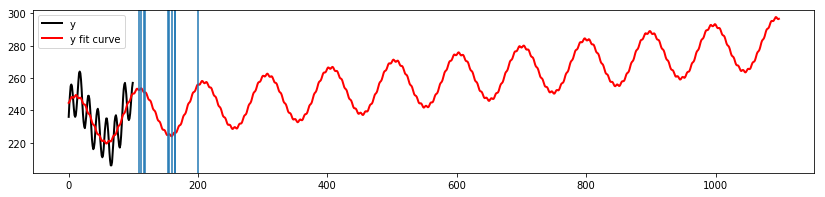

[False False False False  True False  True False False False False False
 False False  True False False False False False  True False  True False
 False  True False False  True False False False  True False False False
  True False False False  True False  True False  True False False False
 False  True False  True False False False False  True False  True False
  True False False False  True False False False  True False False False
  True False False  True False False  True False  True False False False
 False False  True False False False False False False False  True False
  True False False False]
7


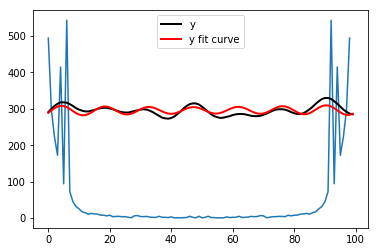

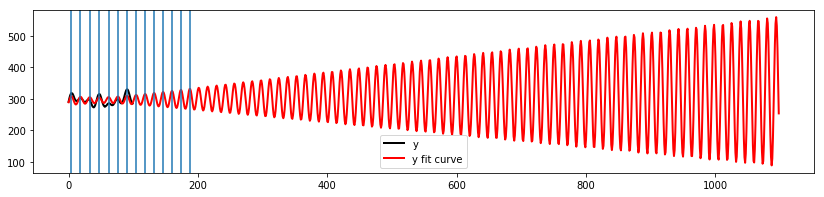

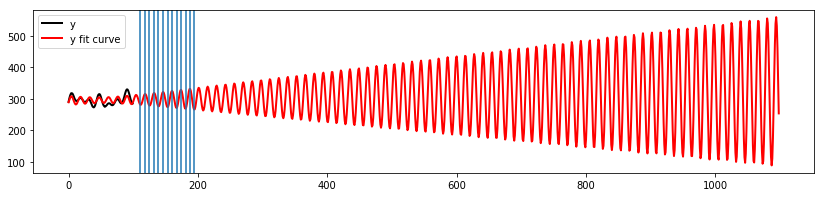

In [2]:
for ar in arr:
    optimise_case(ar)